In [1]:
import toml
import sys
sys.path = ["/scratch/x77/ahg157/software/python-ale/build/lib.linux-x86_64-3.9"] + sys.path
import pyale
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np

In [8]:
params = toml.load("/g/data/x77/amh157/anu-tub/diagnostics/params_adapt.toml")

In [9]:
cs = pyale.mom_init_cs(params)

 log_version: MOM_domains                             , unknown
 MOM_domains                              REENTRANT_X:  F
 MOM_domains                              REENTRANT_Y:  F
 MOM_domains                              TRIPOLAR_N:  F
 MOM_domains                              !SYMMETRIC_MEMORY_:  T
 MOM_domains                              NONBLOCKING_UPDATES:  F
 MOM_domains                              THIN_HALO_UPDATES:  F
 MOM_domains                              !STATIC_MEMORY_:  F
 MOM_domains                              NIGLOBAL:          160
 MOM_domains                              NJGLOBAL:          800
 MOM_domains                              NIHALO:            4
 MOM_domains                              NJHALO:            4
 MOM_domains                              MASKTABLE: 'MOM_mask_table'
 MOM_domains                              NIPROC:            1
 MOM_domains                              NJPROC:            1
 MOM_domains                              LAYOUT:     

In [10]:
restart_filename = '/scratch/x77/amh157/mom6/archive/zstar/restart300/MOM.res.nc'
pyale.load_mom_restart(cs, restart_filename)

In [11]:
hycom_cs = pyale.mom_init_regrid(cs, params, "ADAPTIVE")
h_new = pyale.do_regrid(cs, hycom_cs)

 init_MOM_state INPUTDIR: '/g/data/x77/amh157/mom6/input/anu-tub'
 init_MOM_state REGRIDDING_COORDINATE_UNITS: 'm'
 init_MOM_state INTERPOLATION_SCHEME: 'P1M_H2'
 init_MOM_state DEFAULT_2018_ANSWERS:  F
 init_MOM_state REMAPPING_2018_ANSWERS:  F
 init_MOM_state BOUNDARY_EXTRAPOLATION:  F
 init_MOM_state ALE_COORDINATE_CONFIG                   : 'FNC1:2,4000,4.5,.01'
 init_MOM_state !ALE_RESOLUTION                          :    2.0000000000000000        2.0000000000000000        2.0000000000000000        2.0000000000000000        2.0000000000000000        2.0000000000000000        2.0000000000000000        2.0099999999999998        2.0099999999999998        2.0200000000000000        2.0299999999999998        2.0499999999999998        2.0800000000000001        2.1099999999999999        2.1499999999999999        2.2100000000000000        2.2800000000000002        2.3700000000000001        2.4800000000000000        2.6099999999999999        2.7700000000000000        2.9500000000000002     

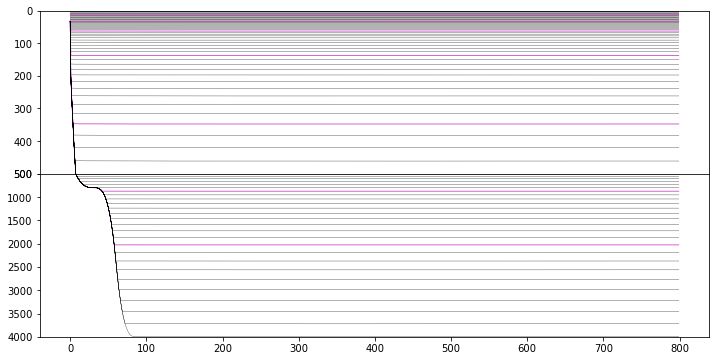

In [12]:
h_depth = np.cumsum(h_new[39,:,:],1)

plt.figure(figsize=(12,6))
plt.subplot(211)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(h_depth[:,ii],'m',linewidth=0.6)
    else:
        plt.plot(h_depth[:,ii],'k',linewidth=0.3)
plt.ylim([0,500])
plt.gca().invert_yaxis()
    
plt.subplot(212)
for ii in range(75):
    if np.mod(ii,10)==5:
        plt.plot(h_depth[:,ii],'m',linewidth=0.6)
    else:
        plt.plot(h_depth[:,ii],'k',linewidth=0.3)
plt.ylim([500,4000])
plt.gca().invert_yaxis()
    
plt.subplots_adjust(hspace=0)

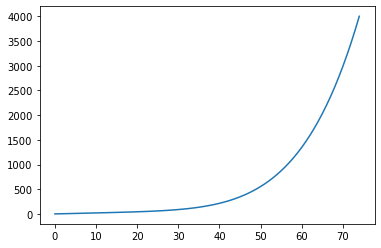

In [7]:
plt.plot(h_depth[400,:])